### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [706]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [707]:
# Question 1: Import the datafile tw_tweets_users_media_places.csv that was 
# provided with this checkpoint. Set tweet_id as the index. Print the number 
# of records in this dataset in the output. How many records are there?
tweets_df = pd.read_csv('tw_tweets_users_media_places.csv')
tweets_df.set_index('tweet_id', inplace=True)
tweets_df.shape[0]

534

In [708]:
# Question 2: Make a copy of the DataFrame with all non-numeric features
# removed. Print out a list of the remaining columns in the output. Print
# the first five records of this reduced dataset.
df = tweets_df.select_dtypes(include=['number'])
print(df.columns)
display(df.head())

Index(['context_annotations_count', 'count_annotations', 'count_cashtags',
       'count_hashtags', 'count_mentions', 'count_urls', 'likes', 'quotes',
       'referenced_tweet_count', 'replies', 'retweets', 'followers_count',
       'following_count', 'tweet_count', 'listed_count', 'height', 'width'],
      dtype='object')


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width
tweet_id,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048


In [709]:
# Question 3: Using 'retweets' as the label, create an MLR model using all
# features except 'likes', 'quotes', 'replies', and the label. These features
# each represent outcomes, or alternatives to the label 'rewteets.' If our
# plan is to use this model to predict the popularity of new potential tweets,
# then we would not know what the likes, quotes, or replies will be. Therefore,
# we will eliminate them from the model. Print out the model results summary.
import statsmodels.api as sm

y = df['retweets']
X = pd.get_dummies(df.drop(columns=['retweets', 'likes', 'quotes', 'replies']), drop_first=True).assign(const=1)
X[X.select_dtypes(bool).columns] = X.select_dtypes(bool).astype(int)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           3.81e-05
Time:                        20:38:15   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [710]:
# Question 4: Add the scored (i.e. predicted) values for every record 
# back into the original dataframe using the column label "model_1". Print
# the first five records.
predictions = pd.DataFrame({'model_1': model.fittedvalues})
tweets_df["model_1"] = predictions
tweets_df.head()

,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,...,False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,6.395809
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,...,False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,2.022634
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,...,False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,5.030170
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,1.159034
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,1.159034


In [711]:
# Question 5: Calculate and/or print the following five metrics for the 
# model you ran in the prior steps: R-squared, R-squared adjusted, RMSE, 
# MAE, and mean of the label column. 
print(model.rsquared)
print(model.rsquared_adj)


df_results = pd.DataFrame({'Predicted': model.fittedvalues,
                           'Actual' : y,
                           'Difference' : abs(y - model.fittedvalues),
                           'Squared diff' : (y - model.fittedvalues)**2})

mae = df_results['Difference'].mean()
print(f"Mean absolute error (MAE):\t{mae:.2f}")

rmse = df_results['Squared diff'].mean()**(1/2)
print(f"Root mean squared error (RMSE):\t{rmse:.2f}")

print(f"Mean of retweets: {df['retweets'].mean():.2f}")





0.07614441144416206
0.0548655879073674
Mean absolute error (MAE):	5.16
Root mean squared error (RMSE):	18.93
Mean of retweets: 3.90


In [712]:
# Question 6: We need to improve the model fit so that our predictions will
# be more accurate. Let's begin by incorporating the two date columns from
# the original dataset. Convert the features 'created_at_tweet' and 
# 'created_at_author' to an integer representing the number of days since
# those dates until January 1st, 2022. Do not put these values into new 
# columns. Replace the existing dates with those values. 

# HINT: First, cast those columns to dt.date data types. Second, there are
# many ways to calculate the number of days until January 1, 2022. But I 
# used the strptime() method of the datetime package to cast "2022-1-1" 
# into a date, subtract the column value from that date, and then return 
# the result in days (.dt.days). 

# Print the first five records of this new dataset.

tweets_df['created_at_tweet'] = (pd.to_datetime('2022-01-01') - pd.to_datetime(tweets_df['created_at_tweet']).dt.tz_convert(None)).dt.days
tweets_df['created_at_author'] = (pd.to_datetime('2022-01-01') - pd.to_datetime(tweets_df['created_at_author']).dt.tz_convert(None)).dt.days

tweets_df.head()



,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,...,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,model_1
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,100,en,14,...,False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,6.395809
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,103,en,7,...,False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,2.022634
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,629,en,49,...,False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,5.030170
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,624,en,3,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,1.159034
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,627,en,15,...,False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,1.159034


In [713]:
# Question 7: Create another model that includes these two new columns
# representing the number of days since Jan 1, 2022. As before, eliminate
# all remaining non-numeric features and the other label candidates 'likes',
# 'quotes', and 'replies'. 

# Print out the results summary.

# HINT: Do not forget that if you are using the same DataFrame that contained
# the 'model_1' predicted values column, you will need to drop that column as 
# well. Otherwise, you are creating a new model to predict retweet count using
# a predicted value of retweet count from a prior model run which doesn't make
# any sense. However, you may have created a copy of the DataFrame in some 
# prior task so that 'model_1' is not even in the DataFrame you are using now. 
# In that case, this HINT is irrelevant.

df['created_at_tweet'] = tweets_df['created_at_tweet']
df['created_at_author'] = tweets_df['created_at_author']

y = df['retweets']
X = df.drop(columns=['retweets', 'likes', 'quotes', 'replies']).assign(const=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.225
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           6.40e-05
Time:                        20:38:16   Log-Likelihood:                -2327.1
No. Observations:                 534   AIC:                             4684.
Df Residuals:                     519   BIC:                             4748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [714]:
# Question 8: Once again, print out the fit metrics--R-squared, R-squared-adjusted,
# RMSE, MAE--as well as the label mean for this revised model. 
print(model.rsquared)
print(model.rsquared_adj)


df_results = pd.DataFrame({'Predicted': model.fittedvalues,
                           'Actual' : y,
                           'Difference' : abs(y - model.fittedvalues),
                           'Squared diff' : (y - model.fittedvalues)**2})

mae = df_results['Difference'].mean()
print(f"Mean absolute error (MAE):\t{mae:.2f}")

rmse = df_results['Squared diff'].mean()**(1/2)
print(f"Root mean squared error (RMSE):\t{rmse:.2f}")

print(f"Mean of retweets: {df['retweets'].mean():.2f}")


0.08003388236213416
0.05521784065321289
Mean absolute error (MAE):	5.26
Root mean squared error (RMSE):	18.89
Mean of retweets: 3.90


In [715]:
# Question 9: We want to improve model fit even further by generating 
# dummy codes for some of the categorical features that do not have too many 
# group values like 'text' and 'url' do. In particular, generate dummy 
# codes for 'lang', 'reply_settings', 'source', 'protected', 'verified', and
# 'terms' and include them in the original dataframe. Remove all remaining 
# non-numeric features as well as the alternative labels 'likes', 'quotes', 
# and 'replies'. As in #7, make sure you are not including the 'model_1' 
# column of predicted values. Do not train the model again yet. You are 
# just creating the dummy codes in this step.

# Print out the first five records after the dummy codes are created.
merge = pd.get_dummies(tweets_df[['lang', 'reply_settings', 'source', 'protected', 'verified', 'terms']], drop_first=True).assign(const=1)
merge[merge.select_dtypes(bool).columns] = merge.select_dtypes(bool).astype(int)

tweets_df = pd.concat([tweets_df.select_dtypes(include=['number']), merge], axis=1)

tweets_df.drop(columns=['likes', 'quotes', 'replies', 'const', 'model_1'], inplace=True)

tweets_df.head()


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,retweets,created_at_author,...,"terms_lockdown%20""sensory overload""",terms_lockdown%20autism,terms_lockdown%20autistic,"terms_pandemic%20""sensory overload""",terms_pandemic%20autism,terms_pandemic%20autistic,"terms_quarantine%20""sensory overload""",terms_quarantine%20autism,terms_quarantine%20autistic,terms_quarantine%20neurotypical
tweet_id,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,100,0,0,3352,...,0,0,0,0,0,0,0,0,0,0
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,103,0,0,2873,...,0,0,0,0,0,0,0,0,0,0
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,629,0,20,3651,...,0,0,0,0,0,0,0,0,0,0
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,624,0,1,3651,...,0,0,0,0,0,0,0,0,0,0
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,627,0,21,3651,...,0,0,0,0,0,0,0,0,0,0


In [716]:
# Question 10: Generate another model using all remaining numeric features
# along with these new dummy codes AND the days since dates features we 
# created previously. Print out the results summary.
y = tweets_df['retweets']
X = tweets_df.drop(columns=['retweets']).assign(const=1)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.643
Date:                Sat, 22 Feb 2025   Prob (F-statistic):            0.00436
Time:                        20:38:16   Log-Likelihood:                -2305.7
No. Observations:                 534   AIC:                             4717.
Df Residuals:                     481   BIC:                             4944.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [717]:
# Question 11: Now we have a fairly large number of features. But not all of
# them are significantly helping the model. Many of them have non-significant
# p-values or may be suffering from excessive multi-collinearity. Calculate
# the VIF score for each feature and add it to a new DataFrame. Sort the 
# DataFrame from largest to smallest VIF score and display it in the output.
# HINT: There may be a function in the book to help you with this.

df_vif = pd.DataFrame(columns=['VIF'])

# Loop through the X features only to generate VIF score for each
for col in X:
    y = X[col] # Each X feature takes a turn being the y
    # All remaining X features are used to predict that y
    X = X.drop(columns=[col]).assign(const=1)

    r_squared = sm.OLS(y, X).fit().rsquared # Record the R squared from the model
    df_vif.loc[col] = [1/(1 - r_squared)]

# Print out the list of VIF scores sorted from highest (worst) to lowest (best)
df_vif.sort_values(by=['VIF'], ascending=False)

C:\Users\camde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\camde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\camde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,VIF
source_Twitter for Android,21.117790
lang_en,20.429188
followers_count,20.370981
source_Hootsuite Inc.,5.085169
tweet_count,2.447762
following_count,2.412722
terms_coronavirus%20autism,2.201545
height,2.127643
context_annotations_count,1.947911
count_hashtags,1.613551


In [718]:
# Question 12: We need to eliminate those features with excessive multi-collinearity. 
# However, this may happen naturally as we remove those features with large p-values. 
# Therefore, start by removing the feature with the highest p-value and then rerun 
# the prior model. One-at-a-time, continue removing the feature with the highest p-value 
# (rerunning the model each time) until the difference between R-squared and R-squared
# adjusted is <= 0.01 (rounded). 

# Why would we do this? Because when R-squared adjusted is significantly lower than 
# R-squared, we have too many variables in the model that are not significantly 
# contributing to model fit. Once more, remove the highest p-value feature one-at-a-time
# until R-squared minus R-squared adjusted is <= 0.01 (rounded). You do NOT need to keep
# the results summary of every model. You can overwrite the prior model summary each time
# until you meet the criterion.

y = tweets_df['retweets']
# add in highest p values after each run
X = tweets_df.drop(columns=['retweets', 'lang_es', 'count_cashtags', 'terms_lockdown%20"sensory overload"', 'terms_quarantine%20neurotypical', 'terms_covid19%20autistic', 'terms_pandemic%20"sensory overload"',
                            'terms_quarantine%20autistic', 'lang_it', 'protected', 'terms_covid%20"sensory overload"', 'context_annotations_count', 'terms_quarantine%20"sensory overload"',
                            'terms_"social distancing"%20autistic', 'terms_corona%20autistic', 'terms_covid%20"sensory processing"', 'source_dlvr.it', 'source_Twitter for iPhone', 'source_Hootsuite Inc.',
                            'lang_tr', 'listed_count', 'terms_lockdown%20autism', 'reply_settings_mentionedUsers', 'lang_in', 'lang_en', 'lang_fr', 'lang_und', 'count_mentions', 'verified', 'following_count',
                            'terms_covid%20autistic', 'terms_pandemic%20autism', 'terms_lockdown%20autistic', 'tweet_count', 'count_annotations', 'terms_covid-19%20autistic', 'terms_quarantine%20autism',
                            'terms_covid-19%20autism', 'terms_pandemic%20autistic', 'terms_corona%20autism', 'source_Sprout Social', 'height', 'width', 'terms_covid%20autism', 'source_Twitter for Android',
                            'referenced_tweet_count']).assign(const=1)

# train the new model
m = sm.OLS(y, X).fit()
highest_p = m.pvalues.sort_values(ascending=False).index[0]

print(f"{highest_p} will be dropped next.")

difference = round(m.rsquared - m.rsquared_adj, 2)
print(f"difference is {difference}")
print(m.summary())


created_at_author will be dropped next.
difference is 0.01
                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     8.494
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           6.65e-12
Time:                        20:38:16   Log-Likelihood:                -2313.0
No. Observations:                 534   AIC:                             4646.
Df Residuals:                     524   BIC:                             4689.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [719]:
# Question 13: For the remaining features in the last model you produced
# where the difference between R2 and R2-adj is <= 0.01, calculate the VIF
# scores and print them out in a table from largest VIF to smallest.
df_vif = pd.DataFrame(columns=['VIF'])

# Loop through the X features only to generate VIF score for each
for col in X:
    y = X[col] # Each X feature takes a turn being the y
    # All remaining X features are used to predict that y
    X = X.drop(columns=[col]).assign(const=1)

    r_squared = sm.OLS(y, X).fit().rsquared # Record the R squared from the model
    df_vif.loc[col] = [1/(1 - r_squared)]

# Print out the list of VIF scores sorted from highest (worst) to lowest (best)
df_vif.sort_values(by=['VIF'], ascending=False)



C:\Users\camde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,VIF
count_hashtags,1.321147
created_at_author,1.061771
count_urls,1.055731
created_at_tweet,1.040317
terms_coronavirus%20autism,1.030592
followers_count,1.005936
terms_coronavirus%20autistic,1.005084
source_Twitter for iPad,1.001786
terms_covid19%20autism,1.000000
const,0.000000


In [720]:
# Question 14: Now we have a nice and trim model. However, we cannot 
# compare the coefficients to each other since they are each on different
# scales. Therefore, use a Min-Max normalization to convert all features
# and label to the same scale. Print out the first five records.
tweets_df = tweets_df.drop(columns=['lang_es', 'count_cashtags', 'terms_lockdown%20"sensory overload"', 'terms_quarantine%20neurotypical', 'terms_covid19%20autistic', 'terms_pandemic%20"sensory overload"',
                            'terms_quarantine%20autistic', 'lang_it', 'protected', 'terms_covid%20"sensory overload"', 'context_annotations_count', 'terms_quarantine%20"sensory overload"',
                            'terms_"social distancing"%20autistic', 'terms_corona%20autistic', 'terms_covid%20"sensory processing"', 'source_dlvr.it', 'source_Twitter for iPhone', 'source_Hootsuite Inc.',
                            'lang_tr', 'listed_count', 'terms_lockdown%20autism', 'reply_settings_mentionedUsers', 'lang_in', 'lang_en', 'lang_fr', 'lang_und', 'count_mentions', 'verified', 'following_count',
                            'terms_covid%20autistic', 'terms_pandemic%20autism', 'terms_lockdown%20autistic', 'tweet_count', 'count_annotations', 'terms_covid-19%20autistic', 'terms_quarantine%20autism',
                            'terms_covid-19%20autism', 'terms_pandemic%20autistic', 'terms_corona%20autism', 'source_Sprout Social', 'height', 'width', 'terms_covid%20autism', 'source_Twitter for Android',
                            'referenced_tweet_count'])

from sklearn import preprocessing

df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(tweets_df), columns=tweets_df.columns)
df_minmax.head()


,count_hashtags,count_urls,created_at_tweet,retweets,created_at_author,followers_count,source_Twitter for iPad,terms_coronavirus%20autism,terms_coronavirus%20autistic,terms_covid19%20autism
0,0.00,0.0,0.000000,0.000000,0.630473,0.004192,0.0,0.0,0.0,0.0
1,0.12,0.0,0.005300,0.000000,0.537264,0.000217,0.0,0.0,0.0,0.0
2,0.00,0.0,0.934629,0.060606,0.688655,0.011620,0.0,0.0,0.0,0.0
3,0.12,0.5,0.925795,0.003030,0.688655,0.011620,0.0,1.0,0.0,0.0
4,0.12,0.5,0.931095,0.063636,0.688655,0.011620,0.0,1.0,0.0,0.0


In [721]:
# Question 15: Rerun your last model using the normalized values. Print
# the results summary.
y = df_minmax['retweets']
X = df_minmax.drop(columns=['retweets']).assign(const=1)

m = sm.OLS(y, X).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     8.494
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           6.65e-12
Time:                        20:38:16   Log-Likelihood:                 783.73
No. Observations:                 534   AIC:                            -1547.
Df Residuals:                     524   BIC:                            -1505.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
count_hashtags  

13.29724740865631


<Axes: xlabel='retweets', ylabel='Count'>

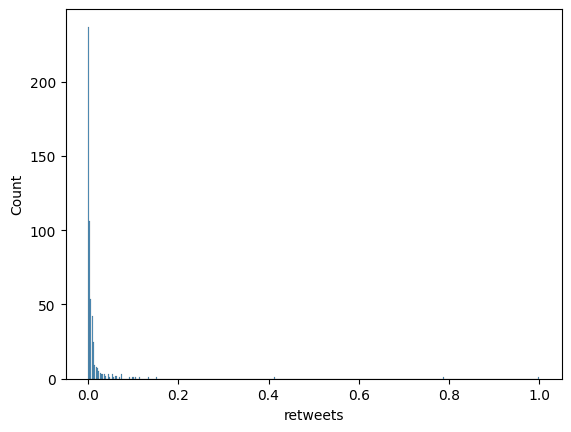

In [722]:
# Question 16: Now that we have addressed multi-collinearity and have
# standardized the features, we should examine and address skewness. Print
# the skewness score for the label 'retweets'. In addition, use the .histplot()
# object from the seaborn package to print out a histogram of 'retweets'.
import seaborn as sns

print(df_minmax['retweets'].skew())

histogram = sns.histplot(df_minmax['retweets'])
histogram




11.836141469609341


<Axes: xlabel='retweets', ylabel='Count'>

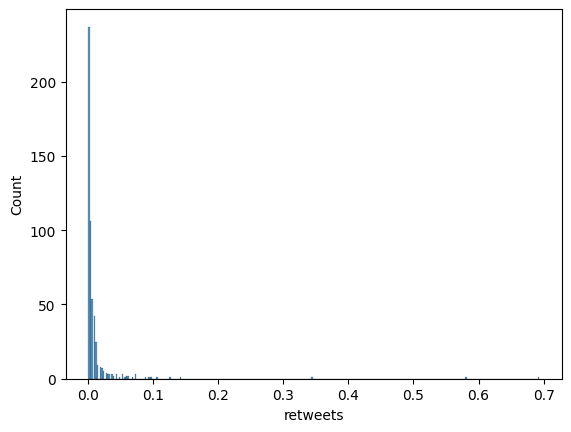

In [723]:
# Question 17: The skewness of retweets is clearly very extreme. However, we cannot 
# create a natural log transformation since there are zero values (ln(0) = undefined).
# Therefore, we need to +1 to all values before we calculate the natural log. 
# Thankfully, there is a numpy method for that: np.log1p(). Convert the 'retweets' 
# label to a natural log +1. Print out the new skewness and histogram.
import numpy as np

skew = np.log1p(df_minmax['retweets'])

print(skew.skew())
histogram = sns.histplot(skew)
histogram

In [727]:
# Question 18: Rerun the last MLR model using this new natural log +1 version
# of 'retweets'. Print out the results summary.

y = skew
X = df_minmax.drop(columns=['retweets']).assign(const=1)

m = sm.OLS(y, X).fit()
print(m.summary())


                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     9.990
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           3.21e-14
Time:                        20:39:57   Log-Likelihood:                 948.34
No. Observations:                 534   AIC:                            -1877.
Df Residuals:                     524   BIC:                            -1834.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
count_hashtags  